# Singular Value Decomposition and Applications

### Frank Cleary | <a href="http://www.frankcleary.com">www.frankcleary.com</a> | See also: <a href="http://www.frankcleary.com/svdimage">SVD Image Compression</a> | <a href="https://gist.github.com/frankcleary/a89da479d85c98f86e31">Notebook Gist</a>

# Introduction

The singular value decomposition of a matrix has many applications. Here I'll focus on an introduction to singular value decomposition and an application in clustering articles by topic. In another notebook (<a href="http://nbviewer.ipython.org/gist/frankcleary/4d2bd178708503b556b0">link</a>) I show how singular value decomposition can be used in image compression.

Any matrix $A$ can be decomposed to three matrices $U$, $\Sigma$, and $V$ such that $A = U \Sigma V$, this is called singular value decomposition. The columns of $U$ and $V$ are orthonormal and $\Sigma$ is diagonal. Most scientific computing packages have a function to compute the singular value decomposition, I won't go into the details of how to find $U$, $\Sigma$ and $V$ here. Some sources write the decomposition as $A = U \Sigma V^T$, so that their $V^T$ is our $V$. The usage in this notebook is consistent with how numpy's singular value decomposition function returns $V$.

## Example with a small matrix $A$:

If $A = \begin{bmatrix} 1 & 0 \\ 1 & 2 \end{bmatrix}$
                     
$A$ can be written as $U \Sigma V$ where $U$, $\Sigma$, and $V$ are, rounded to 2 decimal places:

$U = \begin{bmatrix} -0.23 & -0.97 \\ -0.97 & 0.23 \end{bmatrix}$
                     
$S = \begin{bmatrix} 2.29 & 0 \\ 0 & 0.87 \end{bmatrix}$
                     
$V = \begin{bmatrix} -0.53 & -0.85 \\ -0.85 & 0.53 \end{bmatrix}$

# Interpretation

Although the singular value decomposition has interesting properties from a linear algebra standpoint, I'm going to focus here on some of its applications and skip the derivation and geometric interpretations.

Let $A$ be a $m \times n$ matrix with column vectors $\vec{a}_1, \vec{a}_2, ..., \vec{a}_n$. In the singular value decomposition of $A$, $U$ will be $m \times m$, $\Sigma$ will be $m \times n$ and $V$ will be $n \times n$. We denote the column vectors of $U$ as $\vec{u}_1, \vec{u}_2, ..., \vec{u}_m$ and $V$  as $\vec{v}_1, \vec{v}_2, ..., \vec{v}_n$, similarly to $A$. We'll call the values along the diagonal of $\Sigma$ as $\sigma_1, \sigma_2, ...$.

We have that $A = U \Sigma V$ where:

$U = \begin{bmatrix} \\ \\ \\ \vec{u}_1 & \vec{u}_2 & \dots & \vec{u}_m \\ \\ \\ \end{bmatrix}$

$\Sigma = \begin{bmatrix} \sigma_1 & 0 & \dots \\ 0 &  \sigma_2 & \dots \\ \vdots & \vdots & \ddots \end{bmatrix}$

$V = \begin{bmatrix} \\ \\ \\ \vec{v}_1 & \vec{v}_2 & \dots & \vec{v}_n \\ \\ \\ \end{bmatrix}$

Because $\Sigma$ is diagonal, the columns of $A$ can be written as:

$\vec{a}_i = \vec{u}_1 * \sigma_1 * V_{1,i} + 
             \vec{u}_2 * \sigma_2 * V_{2,i} + ... = U * \Sigma * \vec{v}_i$
             
This is equivalent to creating a vector $\vec{w}_i$, where the elements of $\vec{w}_i$ are the elements of $\vec{v}_i$, weighted by the $\sigma$'s:

$\vec{w}_i = \begin{bmatrix} \sigma_1V_{1,i} \\ \sigma_2V_{2,i} \\
           \sigma_3V_{3,i} \\ \vdots \end{bmatrix} = \Sigma * \vec{v}_i$
           
Then $\vec{a}_i = U * \vec{w}_i$. That is to say that every column $\vec{a}_i$ of $A$ is expressed by a sum over all the columns of $U$, weighted by the values in the $i^{th}$ column of $V$, and the $\sigma$'s. By convention the order of the columns in $U$ and rows in $V$ is chosen such that the values in 
$\Sigma = \begin{bmatrix} \sigma_1 & 0 & \dots \\ 0 &  \sigma_2 & \dots \\ \vdots & \vdots & \ddots \end{bmatrix}$ obey $\sigma_1 > \sigma_2 > \sigma_3 > ...$. This means that as a whole, the first column of $U$ and the first row of $V$ contribute more to the final values of $A$ than subsequent columns. This has applications in image compression (<a href="http://nbviewer.ipython.org/gist/frankcleary/4d2bd178708503b556b0">link to another notebook</a>) and reducing the dimensionality of data by selecting the most import components.

## Brief discussion of dimensionality

This section isn't required to understand how singular value decomposition is useful, but I've included it for completeness.

If $A$ is $m \times n$ ($m$ rows and $n$ columns), $U$ will be $m \times m$, $\Sigma$ will be $m \times n$ and $V$ will be $n \times n$. However, there are only $r = rank(A)$ non-zero values in $\Sigma$, i.e. $\sigma_1, ..., \sigma_r \neq 0$; $\sigma_{r+1}, ..., \sigma_n = 0$. Therefore columns of $U$ beyond the $r^{th}$ column and rows of $V$ beyond the $r^{th}$ row do not contribute to $A$ and are usually omitted, leaving $U$ an $m \times r$ matrix, $\Sigma$ an $r \times r$ diagonal matrix and $V$ an $r \times n$ matrix.



## Example with data:

Singular value decomposition can be used to classify similar objects (for example, news articles on a particular topic). Note above that similar $\vec{a_i}$'s will have similar $\vec{v_i}$'s.

Imagine four blog posts, two about skiing and two about hockey. I've made up some data about five different words and the number of times they appear in each post:

In [1]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


It looks like posts 1 and 4 pertain to skiing, and while posts 2 and 3 are about hockey.

Imagine the DataFrame <code>post_words</code> as the matrix $A$, where the entries represent the number of times a given word appears in the post. The singular value decomposition of $A$ can be calculated using numpy.

In [5]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print("V = ")
print(np.round(V, decimals=2))

V = 
[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


Recall that $\vec{a}_i = U * \Sigma * \vec{v}_i$, that is each column $\vec{v}_i$ of $V$ defines the entries in that column, $\vec{a}_i$, of our data matrix, $A$. Let's label V with the identities of the posts using a DataFrame:

In [6]:
V_df = pd.DataFrame(V, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


Note how post1 and post4 agree closely in value in the first two rows of $V$, as do post2 and post3. This indicates that posts 1 and 4 contain similar words (in this case words relating to skiing). However, the agreement is less close in the last two rows, even among related posts. This is because the weights of the last two rows, $\sigma_3$ and $\sigma_4$, are small compared to $\sigma_1$ and $\sigma_2$. Let's look at the values for the $\sigma$'s.

In [7]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

$\sigma_1$ and $\sigma_2$ are about an order of magnitude greater than $\sigma_3$ and $\sigma_4$, indicating that the values in the first two rows of $V$ are much more important than the values in the last two. In fact we could closely reproduce $A$ using just the first two rows of $V$ and first two columns of $U$, with an error of at most 1 word:

In [9]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(post_words - A_approx)

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946

Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


To help visualize the similarity between posts, $V$ can be displayed as an image. Notice how the similar posts (1 and 4, 2 and 3) have similar color values in the first two rows:

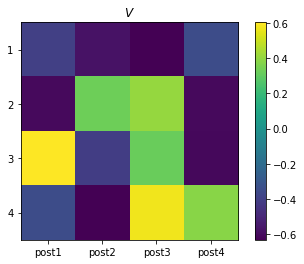

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar();

Another thing the singular value decomposition tells us is what most defines the different categories of posts. The skiing posts have very different values from the hockey posts in the second row of $V$, i.e. $V_{2,1} \approx V_{2, 4}$ and $V_{2,2} \approx V_{2, 3}$ but $V_{2,1} \neq V_{2, 2}$.

Recall from above that:

$\vec{a}_i = \vec{u}_1 * \sigma_1 * V_{1,i} + 
             \vec{u}_2 * \sigma_2 * V_{2,i} + ...$
             
Thus the posts differ very much in how much the values in $\vec{u}_2$ contribute to their final word count. Here is $\vec{u}_2$:

In [14]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


From this we can conclude that, at least in this small data set, the words 'snow' and 'tahoe' identify a different class of posts from the words 'goal' and 'puck'.

# Identifying similar research papers using singular value decomposition

Moving on from the simple example above, here is an application using singular value decomposition to find similar research papers.

I've collect several different papers for analysis. Unfortunately due to the sorry state of open access for scientific papers I can't share the full article text that was used for analysis. <em>Cell</em>, for example, cautions that <b>"you may not copy, display, distribute, modify, publish, reproduce, store, transmit, post, ..."</b> Yikes. However I did chose articles such that you should be able to download the pdf's from the publisher for free.

<h3>Here are the papers included in analysis (with shortened names in parentheses):</h3>

<h4>Two papers on the molecular motor ClpX, describing very similar experiments:</h4>
<li><a href="http://www.cell.com/retrieve/pii/S0092867411004296">ClpX(P) Generates Mechanical Force to Unfold and Translocate Its Protein Substrates</a> (clpx1)
<li><a href="http://www.cell.com/retrieve/pii/S0092867411003138">Single-Molecule Protein Unfolding and Translocation by an ATP-Fueled Proteolytic Machine</a> (clpx2)

<h4>Papers on a very different molecular motor, <a href="http://www.frankcleary.com/research">dynein</a>:</h4>
<li><a href="http://www.cell.com/fulltext/S0092-8674(12)00928-2">Lis1 Acts as a “Clutch” between the ATPase and Microtubule-Binding Domains of the Dynein Motor</a> (dyn-lis1)
<li><a href="http://www.cell.com/abstract/S0092-8674(06)00862-2">Single-Molecule Analysis of Dynein Processivity and Stepping Behavior</a> (dyn-steps1)
<li><a href="https://reck-peterson.med.harvard.edu/sites/reck-peterson.med.harvard.edu/files/publication_pdf/Qiu_2012.pdf">Dynein achieves processive motion using both stochastic and coordinated stepping</a> (dyn-steps2)
<li><a href="http://www2.mrc-lmb.cam.ac.uk/groups/cartera/pdffiles/2012_Schmidt_NSMB.pdf">Insights into dynein motor domain function from a 3.3-A crystal structure</a> (dyn-structure)

<h4>A paper on T-cell signaling:</h4>
<li><a href="https://valelab.ucsf.edu/external/publications/2012jamesNature.pdf">Biophysical mechanism of T-cell receptor triggering in a reconsistuted system</a> (tcell)

## Reading in the data

To start, we'll need to read in the word counts for each paper. I used python <a href="http://www.unixuser.org/~euske/python/pdfminer/">PDFMiner</a> to convert the pdf documents to plain text. I also used a list of "stop words" (<a href="http://norm.al/2009/04/14/list-of-english-stop-words/">link</a>), words such as "the", and "and", that appear in all English documents.

In [15]:
with open('input/stopwords.txt') as f:
    stopwords = f.read().strip().split(',')
    stopwords = set(stopwords)  # use a set for fast membership testing

FileNotFoundError: [Errno 2] No such file or directory: 'input/stopwords.txt'

In [17]:
import collections
import os
import re

def word_count(fname):
    """Return a collections.Counter instance counting
    the words in file fname."""
    
    with open(fname) as f:
        file_content = f.read()
        words = re.split(r'\W+', file_content.lower())
        words = [word for word in words 
                 if len(word) > 3 and word not in stopwords]
        word_count = collections.Counter(words)
        return word_count
        
        
file_list = ['input/papers/' + f for f in os.listdir('input/papers/')
             if f.endswith('.txt')]
word_df = pd.DataFrame()
for fname in file_list:
    word_counter = word_count(fname)
    file_df = pd.DataFrame.from_dict(word_counter,
                                     orient='index')
    file_df.columns = [fname.replace('input/papers/', '').replace('.txt', '')]
    # normalize word count by the total number of words in the file:
    file_df.ix[:, 0] = file_df.values.flatten() / float(file_df.values.sum())
    word_df = word_df.join(file_df, how='outer', )

word_df = word_df.fillna(0)
print("Number of unique words: %s" % len(word_df))

FileNotFoundError: [Errno 2] No such file or directory: 'input/papers/'

Here are the results, sorted by the most common words in the first paper:

In [10]:
word_df.sort(columns=word_df.columns[0], ascending=False).head(10)

,clpx1,clpx2,dyn-lis1,dyn-steps1,dyn-steps2,dyn-structure,tcell
clpx,0.027648,0.006701,0.000000,0.000000,0.000000,0.000535,0.000000
unfolding,0.019516,0.021117,0.000000,0.000000,0.000000,0.000268,0.000000
force,0.016060,0.007919,0.000666,0.000170,0.001911,0.001071,0.001265
figure,0.012604,0.009137,0.011322,0.011923,0.001699,0.002142,0.001898
translocation,0.011588,0.014213,0.000000,0.000000,0.000000,0.000000,0.001265
clpxp,0.011384,0.021117,0.000000,0.000000,0.000000,0.000000,0.000000
motor,0.009555,0.001218,0.009491,0.011923,0.018896,0.009103,0.000000
substrate,0.008538,0.018071,0.000167,0.000000,0.000212,0.000000,0.000316
velocity,0.008335,0.002640,0.005495,0.002044,0.000637,0.000803,0.000000
extension,0.007522,0.001015,0.000000,0.000000,0.000000,0.001071,0.000000


Now to calculate the singular value decomposition of this data.

In [11]:
U, sigma, V = np.linalg.svd(word_df)

Here is a look at $V$, with the column names added:

In [12]:
v_df = pd.DataFrame(V, columns=word_df.columns)
v_df.apply(lambda x: np.round(x, decimals=2))

,clpx1,clpx2,dyn-lis1,dyn-steps1,dyn-steps2,dyn-structure,tcell
0,-0.19,-0.20,-0.55,-0.48,-0.53,-0.27,-0.15
1,-0.61,-0.59,0.25,0.13,0.20,-0.03,-0.41
2,0.33,0.28,-0.09,0.08,0.08,-0.05,-0.89
3,-0.09,-0.05,-0.77,0.32,0.53,0.01,0.10
4,0.07,0.04,0.14,0.14,0.14,-0.96,0.10
5,-0.68,0.73,0.02,0.03,-0.05,-0.02,-0.03
6,0.01,0.07,0.09,-0.79,0.60,-0.01,0.00


Here are the values of $V$ represented as an image:

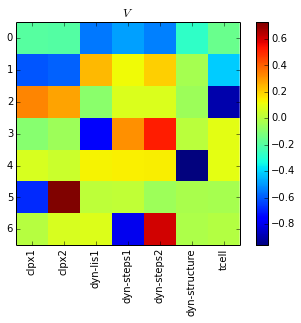

In [13]:
plt.imshow(V, interpolation='none')
ax = plt.gca()
plt.xticks(xrange(len(v_df.columns.values)))
plt.yticks(xrange(len(v_df.index.values)))
plt.title("$V$")
ax.set_xticklabels(v_df.columns.values, rotation=90)
plt.colorbar();

Note how in the above image, in the first three rows the similarities between the clpx papers is apparent, as well as between the first three dyn papers. The last dyn paper is somewhat different, but this is to be expected since it is a structure paper and the other three dyn papers involve more microscopy. In terms of comparing the papers, singular value decomposition allowed us to reduce the 5657 different words found in the papers into 6 values that are pre-sorted in order of importance!

## Quantifying similarity

Now we'll look in more detail at how similar each paper is to the others. I've defined a function to calculate the distance between two column vectors of $V$, weighted by the weights in $\Sigma$. For $\vec{v}_i$ and $\vec{v}_j$ the function calculates $\|\Sigma * (\vec{v}_i - \vec{v}_j)\|$. This function is applied to every pairwise combination of $\vec{v}_i$ and $\vec{v}_j$, giving a metric of how similar two papers are (smaller values are more similar).

,clpx1,clpx2,dyn-lis1,dyn-steps1,dyn-steps2,dyn-structure,tcell
clpx1,0.000000,0.044530,0.091754,0.077374,0.086122,0.074950,0.082144
clpx2,0.044530,0.000000,0.090552,0.075129,0.083906,0.072627,0.079379
dyn-lis1,0.091754,0.090552,0.000000,0.065258,0.071804,0.079625,0.096965
dyn-steps1,0.077374,0.075129,0.065258,0.000000,0.042777,0.068084,0.086867
dyn-steps2,0.086122,0.083906,0.071804,0.042777,0.000000,0.073860,0.093479
dyn-structure,0.074950,0.072627,0.079625,0.068084,0.073860,0.000000,0.081524
tcell,0.082144,0.079379,0.096965,0.086867,0.093479,0.081524,0.000000


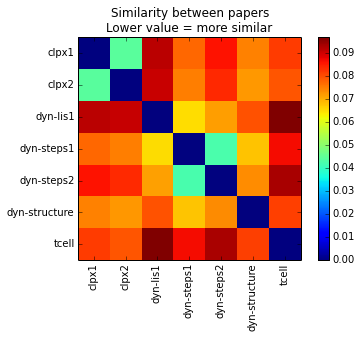

In [14]:
def dist(col1, col2, sigma=sigma):
    """Return the norm of (col1 - col2), where the differences in 
    each dimension are wighted by the values in sigma."""
    return np.linalg.norm(np.array(col1 - col2) * sigma)

dist_df = pd.DataFrame(index=v_df.columns, columns=v_df.columns)
for cname in v_df.columns:
    dist_df[cname] = v_df.apply(lambda x: dist(v_df[cname].values, x.values))
plt.imshow(dist_df.values, interpolation='none')
ax = plt.gca()
plt.xticks(xrange(len(dist_df.columns.values)))
plt.yticks(xrange(len(dist_df.index.values)))
ax.set_xticklabels(dist_df.columns.values, rotation=90)
ax.set_yticklabels(dist_df.index.values)
plt.title("Similarity between papers\nLower value = more similar")
plt.colorbar()
dist_df

The two clpx papers and the two dyn-steps are most similar to each other, as expected, while all the dyn paper do bear some similarity to each other. For a quicker readout, I've grouped the data into three similarity levels (in practice this could be done automatically with a clustering algorithm).

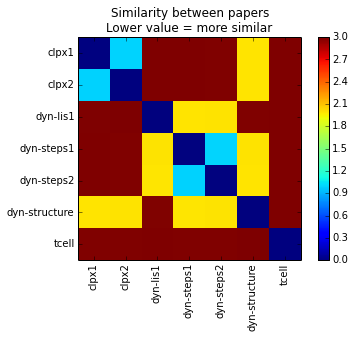

In [15]:
levels = [0.06, 0.075]
binned_df = dist_df.copy()
binned_df[(dist_df <= levels[0]) & (dist_df > 0)] = 1
binned_df[(dist_df <= levels[1]) & (dist_df > levels[0])] = 2
binned_df[(dist_df < 1) & (dist_df > levels[1])] = 3
plt.imshow(binned_df.values, interpolation='none')
ax = plt.gca()
plt.xticks(xrange(len(binned_df.columns.values)))
plt.yticks(xrange(len(binned_df.index.values)))
ax.set_xticklabels(binned_df.columns.values, rotation=90)
ax.set_yticklabels(binned_df.index.values)
plt.title("Similarity between papers\nLower value = more similar")
plt.colorbar();

Finally, let's output a list for each paper of the other papers, sorted in order of decreasing similarity:

In [16]:
for paper in dist_df.columns:
    sim_papers_df = dist_df.sort(columns=paper)[paper]
    sim_papers = sim_papers_df.drop([paper]).index
    print 'Papers most similar to ' + paper + ':'
    print ', '.join(sim_papers)
    print '\n'

Papers most similar to clpx1:
clpx2, dyn-structure, dyn-steps1, tcell, dyn-steps2, dyn-lis1


Papers most similar to clpx2:
clpx1, dyn-structure, dyn-steps1, tcell, dyn-steps2, dyn-lis1


Papers most similar to dyn-lis1:
dyn-steps1, dyn-steps2, dyn-structure, clpx2, clpx1, tcell


Papers most similar to dyn-steps1:
dyn-steps2, dyn-lis1, dyn-structure, clpx2, clpx1, tcell


Papers most similar to dyn-steps2:
dyn-steps1, dyn-lis1, dyn-structure, clpx2, clpx1, tcell


Papers most similar to dyn-structure:
dyn-steps1, clpx2, dyn-steps2, clpx1, dyn-lis1, tcell


Papers most similar to tcell:
clpx2, dyn-structure, clpx1, dyn-steps1, dyn-steps2, dyn-lis1




### See also: <a href="http://www.frankcleary.com/svdimage">SVD Image Compression</a>